In [45]:
import numpy as np
import keras
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten,Dropout
from keras.models import Sequential, Model
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.constraints import maxnorm
from keras.datasets import mnist

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Download Fashion MNIST dataset

In [67]:
from keras.datasets import fashion_mnist

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image_size = x_train.shape[1]*x_train.shape[2]

classes = np.unique(y_train)
num_classes = len(classes) # ten unique digits

# convert y to categorical variable (vector)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Transform from matrix to vector
x_train = x_train.astype('float32')
# Normalize inputs from 0-255 to 0.0-1.0
x_train /= 255

# Transform from matrix to vector
x_test = x_test.astype('float32')
# Normalize inputs from 0-255 to 0.0-1.0
x_test /= 255

In [47]:
print('Number of train examples:', x_train.shape[0])
print('Number of test examples:', x_test.shape[0])

Number of train examples: 60000
Number of test examples: 10000


In [48]:
#batch_size = [8, 16, 32, 64, 128, 256, 512, 1024]
batch_size = 32
#epochs = [10, 50, 100,500,1000]
epochs = 500

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
checkpoint= ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

### Fashion MNIST classifier

In [11]:
# Function to create model, required for KerasClassifier
input_shape = (x_train.shape[1],x_train.shape[2], )

def create_model(neurons=30, dropout_rate=0.5,
                 init_mode='uniform', weight_constraint=0,
                 optimizer='adam', learn_rate=0.01, momentum=0,
                 activation='relu'):
    
    # create model
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(neurons,
              kernel_initializer=init_mode, kernel_constraint=maxnorm(weight_constraint),
              activation=activation)(x)
    
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes,
                   kernel_initializer=init_mode,
                   activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    # Compile model
    # optimizer = optimizer(lr=learn_rate, momentum=momentum)
    # Optimizer     -- Adam
    # Loss function -- Binary cross entropy
    # Metrics       -- Accuracy
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = create_model()

# Print the model
model.summary()

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=[es,checkpoint],
                    validation_split=.1)

loss, accuracy  = model.evaluate(x_test, 
                                 y_test, 
                                 verbose=1)

print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, va

In [13]:
# define the grid search parameters
#batch_size = [8, 16, 32, 64, 128, 256, 512, 1024]
batch_Size = [32]

#epochs = [10, 50, 100,500,1000]
epochS = [500]

#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD']

#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
learn_rate = [0.001, 0.3]

#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activation = ['relu', 'sigmoid']

#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate = [0.0, 0.9]

#neurons = [8, 16, 32, 64, 128, 256, 512, 1024]
neurons = [8, 1024]

param_grid = dict(batch_size=batch_Size
                  ,neurons=neurons
                  ,dropout_rate=dropout_rate
                  ,epochs=epochS
                  ,optimizer=optimizer 
                  ,learn_rate=learn_rate 
                  ,activation=activation
                 )

In [14]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# We use only a small part of the dataset
grid_result = grid.fit(x_train[:100], y_train[:100], verbose=2)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 2/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 3/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 4/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 5/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 6/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 7/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 8/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 9/500
 - 0s - loss: 0.3251 - accuracy: 0.9000
Epoch 10/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 11/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 12/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 13/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 14/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 15/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 16/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 17/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 18/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Epoch 19/500
 - 0s - loss: 0.3250 - accuracy: 0.9000
Ep

Epoch 155/500
 - 0s - loss: 0.3246 - accuracy: 0.9000
Epoch 156/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 157/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 158/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 159/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 160/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 161/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 162/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 163/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 164/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 165/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 166/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 167/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 168/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 169/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 170/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 171/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 172/500
 - 0s - loss: 0.3245 - accuracy: 0.9000
Epoch 173/500
 - 0s - loss: 

Epoch 307/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 308/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 309/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 310/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 311/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 312/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 313/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 314/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 315/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 316/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 317/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 318/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 319/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 320/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 321/500
 - 0s - loss: 0.3241 - accuracy: 0.9000
Epoch 322/500
 - 0s - loss: 0.3240 - accuracy: 0.9000
Epoch 323/500
 - 0s - loss: 0.3240 - accuracy: 0.9000
Epoch 324/500
 - 0s - loss: 0.3240 - accuracy: 0.9000
Epoch 325/500
 - 0s - loss: 

Epoch 459/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 460/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 461/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 462/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 463/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 464/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 465/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 466/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 467/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 468/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 469/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 470/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 471/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 472/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 473/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 474/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 475/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 476/500
 - 0s - loss: 0.3237 - accuracy: 0.9000
Epoch 477/500
 - 0s - loss: 

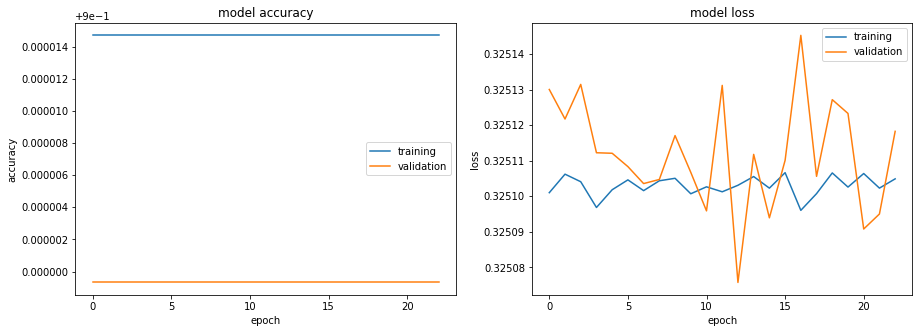

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Fashion MNIST classifier with encoder

Encoder - Decoder architecture

In [17]:
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

input_img= Input(shape=(image_size,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()

encoder = Model(input_img, encoded)
encoder.summary()

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                callbacks=[es,checkpoint],
                validation_data=(x_test, x_test))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               1011

Epoch 41/500
60000/60000 [==============================] - 9s 144us/step - loss: 0.2776 - accuracy: 0.5084 - val_loss: 0.2796 - val_accuracy: 0.5060
Epoch 42/500
60000/60000 [==============================] - 8s 137us/step - loss: 0.2774 - accuracy: 0.5084 - val_loss: 0.2791 - val_accuracy: 0.5060
Epoch 43/500
60000/60000 [==============================] - 8s 135us/step - loss: 0.2772 - accuracy: 0.5084 - val_loss: 0.2803 - val_accuracy: 0.5059
Epoch 44/500
60000/60000 [==============================] - 9s 143us/step - loss: 0.2771 - accuracy: 0.5084 - val_loss: 0.2796 - val_accuracy: 0.5060
Epoch 45/500
60000/60000 [==============================] - 8s 139us/step - loss: 0.2769 - accuracy: 0.5085 - val_loss: 0.2790 - val_accuracy: 0.5061
Epoch 46/500
60000/60000 [==============================] - 8s 137us/step - loss: 0.2768 - accuracy: 0.5085 - val_loss: 0.2800 - val_accuracy: 0.5059
Epoch 47/500
60000/60000 [==============================] - 8s 135us/step - loss: 0.2767 - accuracy:

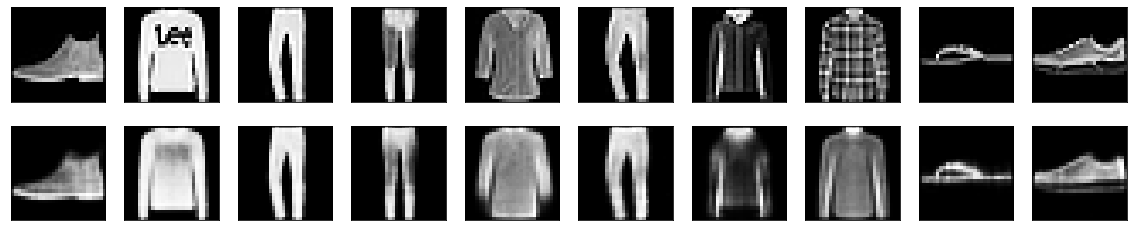

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Stack up with classifier

In [19]:
input_img = Input((image_size,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

out = Dense(num_classes, activation='softmax')(encoded)

model = Model(input_img, out)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=True,
                    callbacks=[es,checkpoint],
                    validation_split=.1)
 
loss, accuracy  = model.evaluate(x_test, 
                                 y_test, 
                                 verbose=True)

print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/500
54000/54000 [==============================] - 8s 150us/st

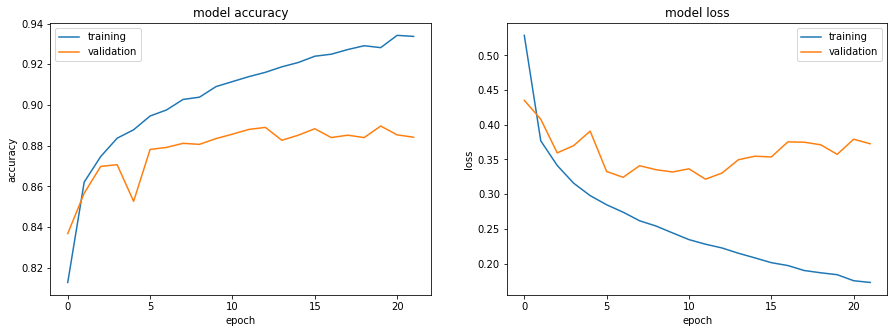

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Fashion MNIST classifier with denoising autoencoder

Add gaussian noise to the images

In [30]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# convert y to categorical variable (vector)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

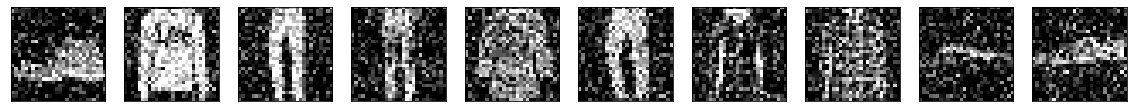

In [32]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

####  Encoder - decoder architecture

In [33]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                callbacks=[es,checkpoint],
                validation_data=(x_test_noisy, x_test))


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0  

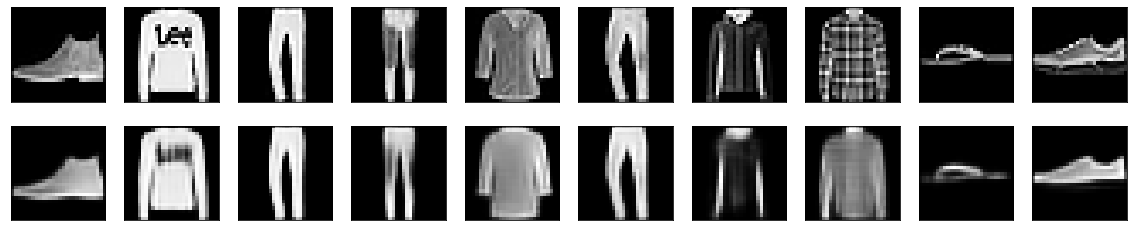

In [71]:
x_test = x_test.reshape(x_test.shape[0],28, 28,1)
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Stack up with classifier

In [73]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

flat = Flatten()(encoded)
den = Dense(128, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(den)

model = Model(input_img, out)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(x_train_noisy, y_train, 
                    batch_size=256, 
                    epochs=10, 
                    verbose=True, 
                    callbacks=[es,checkpoint],
                    validation_split=.1)

loss, accuracy  = model.evaluate(x_test_noisy, 
                                 y_test, 
                                 verbose=True)

print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               2008

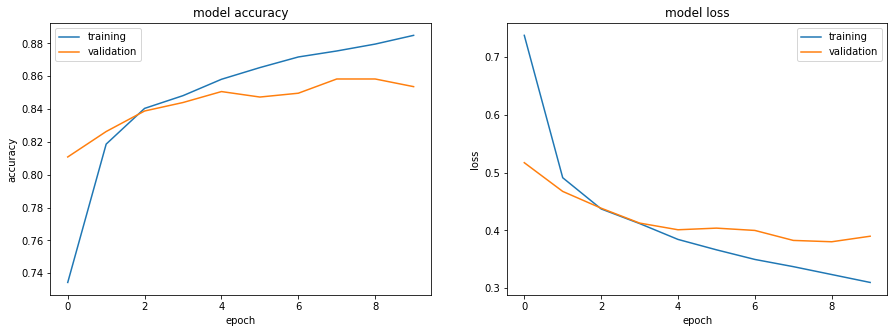

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()